In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [36]:
nltk.download()

True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

/home/biswadipmandal/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
df=pd.read_csv('Tweets.csv')
#df_United=df[df.airline=='United']
df_customer_service=df[df.negativereason=='Customer Service Issue']
Cust_ser_tweet=df_customer_service['text'].tolist()

In [39]:
Cust_ser_tweet_sum='text'

for tweets in Cust_ser_tweet:
    Cust_ser_tweet_sum=Cust_ser_tweet_sum+" "+tweets



In [41]:
from nltk import FreqDist

#fdist_words=FreqDist(Cust_ser_tweet_sum)

In [42]:
#Decoding data
Cust_tweet_sum_decoded = Cust_ser_tweet_sum.decode("utf8").encode("ascii","ignore")

In [44]:
#spliting tweet in words 
Cust_tweet_words_temp1=Cust_tweet_sum_decoded.split()

In [45]:
#removing stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
Cust_tweet_words_temp=[word for word in Cust_tweet_words_temp1 if word not in stop]

In [46]:
#creating 'Text' datatype and removing small words
Cust_tweet_text_temp=nltk.Text(Cust_tweet_words_temp)
Cust_tweet_words_temp2=[]
Cust_tweet_words_temp2=[eln for eln in Cust_tweet_words_temp if len(eln)>4]
#filtering the words with length greater than 3.(words with length than 3 is not much use to us)

In [47]:
#Removing elements which starts with @
Cust_tweet_words=[string for string in Cust_tweet_words_temp2 if string.startswith('@')==False]


In [ ]:
#steaming


In [53]:
fdist_words=FreqDist(Cust_tweet_words)
Cust_tweet_text=nltk.Text(Cust_tweet_words)
fdist_words

FreqDist({'connect?': 1,
          'limited': 3,
          'update.': 1,
          'reform.': 1,
          'better.': 4,
          'geeks.': 1,
          'DELAY': 1,
          "friend's": 1,
          'hanging': 14,
          'knowledge.Provide': 1,
          'update?': 1,
          'Burned': 1,
          'refund...': 1,
          'localized': 1,
          'whose': 1,
          'snowing': 1,
          'Preferred': 1,
          'Everyone': 2,
          'refunding': 1,
          '#weakservice': 1,
          'stuck.': 1,
          'sorry': 12,
          'Revenue': 1,
          'updated': 5,
          'otherwise.': 1,
          'today?': 7,
          'desired': 1,
          'regional': 1,
          'Support"': 1,
          'advice,': 1,
          'appropriation': 1,
          'updates': 7,
          'today!': 1,
          'Flightr???': 1,
          'today.': 17,
          'guys..': 1,
          'today,': 2,
          'screaming': 1,
          'pasengers': 1,
          'skills': 1,
        

In [51]:
#WORDS WITH FREQUENCY GREATER THAN 100
frequent_words1=[]
frequent_words1=[word for word in Cust_tweet_text if fdist_words[word]>100 and len(word)>4]
fdist_final1=FreqDist(frequent_words1)
fdist_final1

FreqDist({'Cancelled': 145,
          "can't": 151,
          'customer': 444,
          "don't": 111,
          'flight': 296,
          'hours': 158,
          'phone': 199,
          'service': 388,
          'still': 141,
          'trying': 133,
          'would': 113})

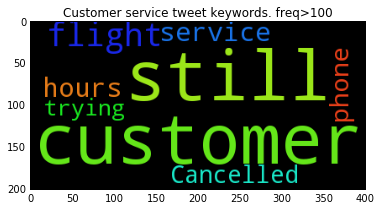

In [52]:
#WORDS WITH FREQUENCY GREATER THAN 100
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(fdist_final1.keys()))
plt.title('Customer service tweet keywords. freq>100')
plt.imshow(wordcloud)

In [25]:
#WORDS WITH FREQUENCY GREATER THAN 50
frequent_words2=[]
frequent_words2=[word for word in Cust_tweet_text if fdist_words[word]>50 and fdist_words[word]<500 and len(word)>4]
fdist_final2=FreqDist(frequent_words2)
fdist_final2

FreqDist({'Cancelled': 145,
          'Flight': 83,
          'agent': 72,
          'airline': 53,
          'called': 67,
          "can't": 151,
          'change': 92,
          'customer': 444,
          'customers': 54,
          "don't": 111,
          'email': 67,
          'flight': 296,
          'flight.': 52,
          'getting': 62,
          'going': 58,
          'hours': 158,
          'minutes': 93,
          'never': 66,
          'number': 74,
          'people': 72,
          'phone': 199,
          'please': 56,
          'response': 57,
          'service': 387,
          'service.': 79,
          'since': 51,
          'someone': 91,
          'speak': 63,
          'still': 141,
          'system': 54,
          'ticket': 53,
          'trying': 133,
          'waiting': 85,
          'website': 52,
          "won't": 54,
          'worst': 57,
          'would': 113})

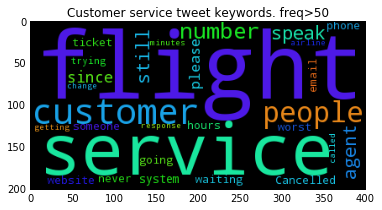

In [26]:
#WORDS WITH FREQUENCY GREATER THAN 50
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(fdist_final2.keys()))
plt.title('Customer service tweet keywords. freq>50')
plt.imshow(wordcloud)

In [133]:
from nltk.util import ngrams

In [136]:
#bigram generator


bigrams=ngrams(Cust_tweet_words_temp,2)
a=list(bigrams)
fdist_bigram=FreqDist(a)


In [140]:
freq_bigrams=[]
freq_bigrams=[element for element in a if fdist_bigram[element] > 20]


In [141]:
fdist_bigrams_final=FreqDist(freq_bigrams)


In [142]:
#Final list of most used bigrams
fdist_bigrams_final

FreqDist({('&amp', '@AmericanAir'): 28,
          ('&amp', '@USAirways'): 25,
          ('2', 'hours'): 46,
          ('@AmericanAir', 'I'): 96,
          ('@JetBlue', 'I'): 25,
          ('@SouthwestAir', 'I'): 43,
          ('@USAirways', '@AmericanAir'): 28,
          ('@USAirways', 'I'): 94,
          ('@USAirways', "I've"): 25,
          ('@USAirways', 'hold'): 21,
          ('@united', 'I'): 73,
          ('Booking', 'Problems'): 22,
          ('Cancelled', 'Flight'): 28,
          ('Cancelled', 'Flighted'): 27,
          ('Cancelled', 'Flightled'): 37,
          ('Flight', 'Booking'): 23,
          ('I', 'call'): 23,
          ('I', 'called'): 28,
          ('I', "can't"): 31,
          ('I', "don't"): 28,
          ('I', 'get'): 55,
          ('I', 'hold'): 29,
          ('I', 'need'): 49,
          ('I', 'never'): 22,
          ('I', 'want'): 24,
          ('I', 'would'): 22,
          ("I've", 'hold'): 46,
          ('Late', 'Flightr'): 28,
          ('On', 'hold'): 25,
     

In [143]:
#most used bigrams using collocations
Cust_tweet_text_temp.collocations()


customer service; customer service.; Cancelled Flightled; call back;
Late Flightr; Booking Problems; Cancelled Flighted; Flight Booking;
I've hold; can't get; Cancelled Flight; worst customer; wait time;
won't let; customer service?; hung on.; keep getting; still haven't;
first class; Late Flightr.
